In [1]:
import googleapiclient.discovery
import time

##API key created on Google Developer 
##Use your Google API Key here
API_KEY = ""

## videoID is after "v=" URL: https://www.youtube.com/watch?v=F6qV6ocSmp4
VIDEO_ID = "F6qV6ocSmp4"

## YouTube API Client
youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=API_KEY)

##API request to get video details
request = youtube.videos().list(part="statistics", id=VIDEO_ID)

response = request.execute()

##Extract video info
video_info = response["items"][0]['statistics']
views = video_info["viewCount"]
current_date = time.strftime("%m/%d/%Y")
print(f"35th SG Under Song has {views} views on {current_date}\n")

35th SG Under Song has 3030980 views on 06/13/2024



In [2]:
import googleapiclient.discovery
from urllib.error import HTTPError
import pandas as pd 
from datetime import datetime
import os

##API key created on Google Developer
## Use your Google API key here
api_key = "" 
##Channel ID for Nogizaka46
channel_id = "UCUzpZpX2wRYOk3J8QTFGxDg"

##Video IDs of the tracks to be scrapped
video_ids = [ "9yCEYQeMqJc", #24th single
              "aXrU5zpy9Pc", #25th single
              "F_WgREJgJhw", #26th single
              "jddS5q0RFpY", #27th single
              "1_oWkusqP4Q", #28th single
              "dPoPxRSifwc", #29th single
              "CSLYbwe9JEo", #30th single
              "3LNH6NT0T7E", #31st single
              "DHea-Qcy9g0", #32nd single
              "Etq_BEjQE10", #33rd single
              "qK9k2J-ZkGU", #34th single
              "iH8wsNO29L0"  #35th single
]

##Columns to be used
column_names = ["Track Name", "Views", "Likes", "MV Release Date DD/MM/YYYY"]

youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=api_key)

##function to retrieve video stats from youtube
def get_video_details (video_id):
    try:
        request = youtube.videos().list(part="snippet,statistics", id=video_id)
        response = request.execute()
        
        if response["items"]:
            video = response["items"][0]
            title = video["snippet"]["title"]
            views = video["statistics"]["viewCount"]
            likes = video["statistics"]["likeCount"]
            upload_date = datetime.strptime(video["snippet"]["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
            formatted_date = upload_date.strftime("%d/%m/%Y")
            return [title, views, likes, formatted_date]
        else:
            return ["N/A", "N/A", "N/A", "N/A"]
    except HTTPError as error:
        print(f"An error occurred: {error}")
        return ["N/A", "N/A", "N/A", "N/A"]

##Create lists of video stats
video_stats = [get_video_details(video_id) for video_id in video_ids]


In [3]:
##Create dataframe and sort the videos by views

df = pd.DataFrame(video_stats, columns = column_names)

df.sort_values(by=["Views"])

df

,Track Name,Views,Likes,MV Release Date DD/MM/YYYY
0,乃木坂46 『夜明けまで強がらなくてもいい』,22393617,119594,08/08/2019
1,乃木坂46 『しあわせの保護色』,14247779,142517,05/03/2020
2,乃木坂46 『僕は僕を好きになる』,16609830,118064,08/01/2021
3,乃木坂46『ごめんねFingers crossed』,14398462,91131,13/05/2021
4,乃木坂46『君に叱られた』,13435749,97396,02/09/2021
5,乃木坂46『Actually...』,8194033,72304,20/03/2022
6,乃木坂46『好きというのはロックだぜ！』,9881471,84064,04/08/2022
7,乃木坂46『ここにはないもの』,10887371,114678,19/11/2022
8,乃木坂46『人は夢を二度見る』,9376397,64702,22/03/2023
9,乃木坂46『おひとりさま天国』,10735988,87109,10/08/2023


In [4]:
## Get ChannelID from user
## Then scrap the video stats - top 10 videos from the channel with views, likes, video release date

In [16]:
import googleapiclient.discovery
from urllib.error import HTTPError
import pandas as pd 
import os
from datetime import datetime
from dotenv import load_dotenv

##Loading environment variable - i.e. the API key stored in .env in the root folder
load_dotenv()

##API key created on Google Developer
API_KEY = os.getenv("YOUTUBE_API_KEY")

youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=API_KEY)

##function to retrieve all video IDs

def get_video_ids(channel_id):
    video_ids = []
    try:
        request = youtube.search().list(
            part="id",
            channelId=channel_id,
            maxResults = 50,
            type="video",
        )
        response = request.execute()
        
        while response["items"]:
            for item in response["items"]:
                video_ids.append(item["id"]["videoId"])
            
            if 'nextPageToken' in response:
                request = youtube.search().list(
                    part="id",
                    channelId=channel_id,
                    maxResults=50,
                    pageToken=response["nextPageToken"],
                    type="video",
                )
                response = request.execute()
            else:
                break
        
    except HTTPError as error:
        print(f"{error} has occurred")

    return video_ids

##function to retrieve video statistics
def get_video_stats(video_id):
    try:
        request = youtube.videos().list(part="snippet,statistics", id=video_id)
        response = request.execute()
        
        if response["items"]:
            video = response["items"][0]
            title = video["snippet"]["title"]
            views = video["statistics"]["viewCount"]
            likes = video["statistics"]["likeCount"]
            upload_date = datetime.strptime(video["snippet"]["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
            formatted_date = upload_date.strftime("%d/%m/%y")
            return [title, views, likes, formatted_date]
        else:
            return ["N/A", 0, 0, "N/A"]
    except HTTPError as error:
        print(f"An error occurred: {error}")
        return ["N/A", 0, 0, "N/A"]



In [17]:

# Channel ID for Nogizaka46
CHANNEL_ID = "UCUzpZpX2wRYOk3J8QTFGxDg"

video_ids = get_video_ids(CHANNEL_ID)
video_stats = [get_video_stats(id) for id in video_ids]


In [18]:
##Column names
column_names = ["Track Name", "Views", "Likes", "Video Release Date"]
df = pd.DataFrame(video_stats, columns = column_names)

In [19]:
##Convert strings in columns ["Views"] and ["Likes"] to integer
df['Views'] = df['Views'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df.head()

,Track Name,Views,Likes,Video Release Date
0,みんなも一緒に夢を見ないか！by美月 #乃木坂青春選手権 #人は夢を二度見る #山下美月 ...,518025,18923,08/04/23
1,恥ずかしいような...恥ずかしくない...ような...恥ずかしいような...😳byかっきー ...,560867,18432,17/04/23
2,踊っていて1番楽しい曲☀️もう12月だけど真夏の気分になれましたか？ライブで披露できますよう...,1028668,32894,06/12/21
3,久しぶりにこの衣装を着て キャピキャピひとりで踊るのはちょっぴり恥ずかしかったです😳by絵梨...,3585353,98344,01/12/21
4,普段は見れない5期生の素顔を見せちゃいますね〜👀by瑛紗 #乃木坂青春選手権 #心にもない...,488934,22440,11/04/23


In [20]:
##Find the top20 most viewed videos (keeping old row indexes)
df.sort_values(by=['Views'], ascending=False)[:20]

,Track Name,Views,Likes,Video Release Date
187,乃木坂46 『裸足でSummer』,40805224,130724,08/07/16
72,乃木坂46 『I see...』,31309752,170653,18/03/20
117,乃木坂46 『I see...』,31309752,170653,18/03/20
170,乃木坂46 『サヨナラの意味』,30099909,172431,21/10/16
164,乃木坂46 『夜明けまで強がらなくてもいい』,22394131,119595,08/08/19
84,乃木坂46『ごめんねFingers crossed』,14398941,91134,13/05/21
140,乃木坂46『ごめんねFingers crossed』,14398941,91134,13/05/21
29,乃木坂46 『制服のマネキン』Short Ver.,14076074,50256,01/12/15
97,乃木坂46『君に叱られた』,13436303,97397,02/09/21
174,乃木坂46『おひとりさま天国』,10737594,87114,10/08/23


In [21]:
df.sort_values(by=['Likes'], ascending=False)[:20]

,Track Name,Views,Likes,Video Release Date
170,乃木坂46 『サヨナラの意味』,30099909,172431,21/10/16
117,乃木坂46 『I see...』,31309752,170653,18/03/20
72,乃木坂46 『I see...』,31309752,170653,18/03/20
158,乃木坂46 『世界中の隣人よ』,8987267,151767,24/05/20
187,乃木坂46 『裸足でSummer』,40805224,130724,08/07/16
164,乃木坂46 『夜明けまで強がらなくてもいい』,22394131,119595,08/08/19
98,ガールズルール！これからも一緒に、泣いたり喜んだりしましょう^_^by飛鳥#乃木坂ダンスプレ...,4036037,116905,14/12/21
156,伊藤万理華 『はじまりか、』,6678925,113642,21/02/18
169,乃木坂46 『じゃあね。』,5183434,104952,12/03/20
3,久しぶりにこの衣装を着て キャピキャピひとりで踊るのはちょっぴり恥ずかしかったです😳by絵梨...,3585353,98344,01/12/21


In [22]:
##Find the top20 most viewed videos (reset row index from 0)
df.sort_values(by=['Views'], ascending=False)[:20].reset_index(drop=True)

,Track Name,Views,Likes,Video Release Date
0,乃木坂46 『裸足でSummer』,40805224,130724,08/07/16
1,乃木坂46 『I see...』,31309752,170653,18/03/20
2,乃木坂46 『I see...』,31309752,170653,18/03/20
3,乃木坂46 『サヨナラの意味』,30099909,172431,21/10/16
4,乃木坂46 『夜明けまで強がらなくてもいい』,22394131,119595,08/08/19
5,乃木坂46『ごめんねFingers crossed』,14398941,91134,13/05/21
6,乃木坂46『ごめんねFingers crossed』,14398941,91134,13/05/21
7,乃木坂46 『制服のマネキン』Short Ver.,14076074,50256,01/12/15
8,乃木坂46『君に叱られた』,13436303,97397,02/09/21
9,乃木坂46『おひとりさま天国』,10737594,87114,10/08/23


In [8]:
##Convert ["MV Release Date") to datetime object
df["Video Release Date"] = pd.to_datetime(df["Video Release Date"], format="%d/%m/%y")

In [23]:
##Find the 20 oldest videos uploaded
df.sort_values(by=['Video Release Date'], ascending=True)[:20].reset_index(drop=True)

,Track Name,Views,Likes,Video Release Date
0,乃木坂46『絶望の一秒前』,3719941,37725,01/02/23
1,9th YEAR BIRTHDAY LIVE 特典映像予告編,342858,10208,01/06/22
2,乃木坂46 新メンバーオーディション 久保史緒里篇,454009,14343,01/08/21
3,乃木坂46 新メンバーオーディション 遠藤さくら篇,566666,16762,01/08/21
4,乃木坂46 新メンバーオーディション 齋藤飛鳥篇,572418,19390,01/08/21
5,乃木坂46 ベストアルバム「Time flies」CM 2012,303718,9243,01/11/21
6,のぎ動画 10月度最新ラインナップ,68147,1733,01/11/21
7,乃木坂46 『春のメロディー』Short Ver.,432251,2496,01/12/15
8,乃木坂46 『制服のマネキン』Short Ver.,14076074,50256,01/12/15
9,乃木坂46 『指望遠鏡』Short Ver.,927847,7633,01/12/15


In [24]:
##Find the 20 latest videos uploaded
df.sort_values(by=['Video Release Date'], ascending=False)[:20]

,Track Name,Views,Likes,Video Release Date
214,餃子おいしい🥟by祐希 #おひとりさま天国 #与田祐希 #乃木坂46,941140,33640,31/07/23
132,乃木坂46 からあげ姉妹『無表情』,875066,21925,31/05/21
304,乃木坂46 松村沙友理×月田茂＆山本篤彦＆柴谷麻以,76622,3554,31/05/21
299,乃木坂46 松村沙友理『ガチャ子さん23』,132713,6481,31/05/21
82,乃木坂46 からあげ姉妹『無表情』,875066,21925,31/05/21
328,乃木坂46 松村沙友理『ガチャ子さん23』,132713,6481,31/05/21
129,【LIVE】乃木坂46 30thSGアンダーライブ（for J-LOD）,341876,7908,30/11/22
371,のぎ動画 9月度最新ラインナップ,92552,2211,30/09/21
207,乃木坂46 『深川麻衣×中村太洸』,152444,892,30/06/13
180,乃木坂46『I see...』メイキング動画,560459,20939,30/04/21


In [25]:
##Data Visualisation
import matplotlib.pyplot as plt
import matplotlib
##To display Japanese characters
matplotlib.rcParams['font.family'] = 'Hiragino sans' 

MAX_TITLE_LENGTH = 30
SPACE_FOR_DOTS = 3

def trim_title (track_name):
    
    if len(track_name) <= MAX_TITLE_LENGTH:
        return track_name
    else:
        return track_name[:(MAX_TITLE_LENGTH-SPACE_FOR_DOTS)] + "..."


<function matplotlib.pyplot.show(close=None, block=None)>

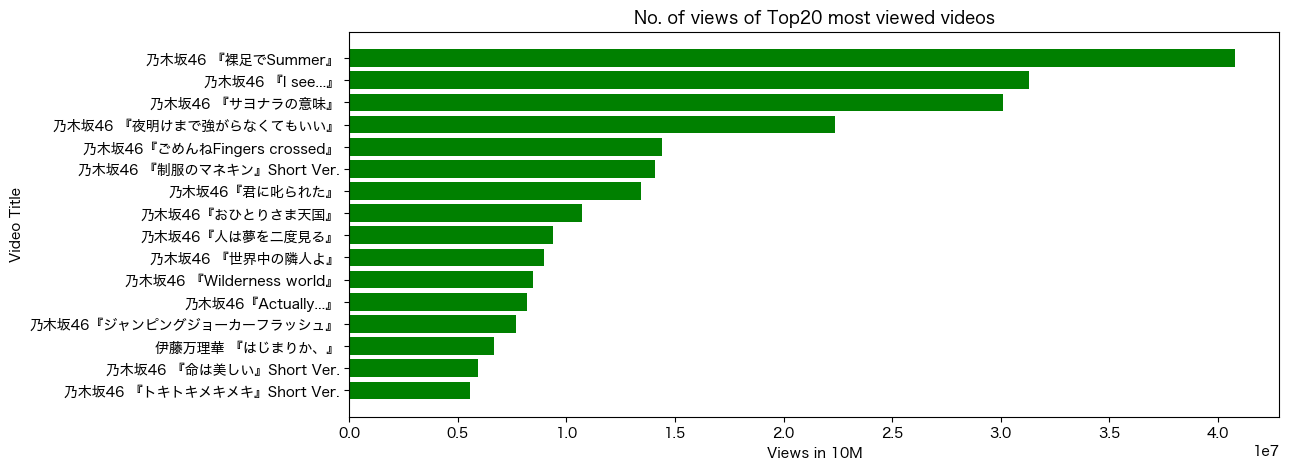

In [26]:
#Plot horizontal bars for views

top20_df = df.sort_values(by=['Views'],ascending=False)[:20]
top20_df["Video Title"] = top20_df["Track Name"].apply(trim_title)

plt.figure(figsize=(12,5))
plt.barh(top20_df['Video Title'], top20_df["Views"], color="green")
plt.xlabel("Views in 10M")
plt.ylabel("Video Title")
plt.title("No. of views of Top20 most viewed videos")

plt.gca().invert_yaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

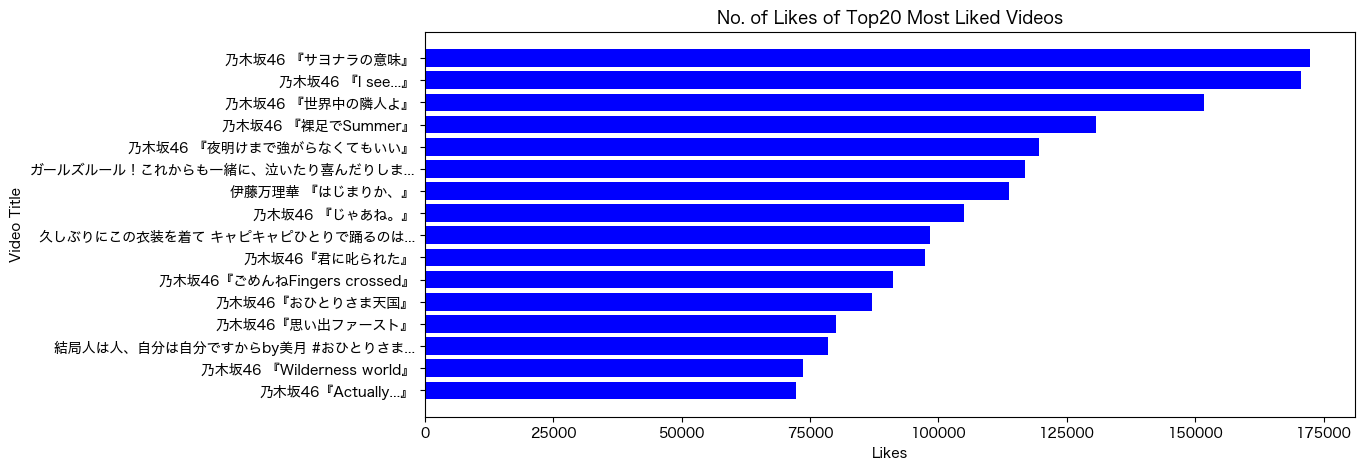

In [27]:
#Plot likes

top20like_df = df.sort_values(by=['Likes'],ascending=False)[:20]
top20like_df["Video Title"] = top20like_df["Track Name"].apply(trim_title)
plt.figure(figsize=(12,5))
plt.barh(top20like_df['Video Title'], top20like_df["Likes"], color="blue")
plt.xlabel("Likes")
plt.ylabel("Video Title")
plt.title("No. of Likes of Top20 Most Liked Videos")

plt.gca().invert_yaxis()
plt.show